In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# les 3 méthodes pour prédire les marées

## Méthode 1
Cette méthode utilise la [Rule of twelfths](https://en.wikipedia.org/wiki/Rule_of_twelfths#References)<br>
C'est une méthode très simple avec peu de paramètres à modifier, nous ne l'avons donc pas utilisée. mais il est assez important pour avoir une idée générale sur la façon dont les marées augmentent.

enter high tide: 5
enter low tide: 4
Hour	Tide Height
0	4.00
1	4.08
2	4.25
3	4.50
4	4.75
5	4.92
6	5.00
7	4.92
8	4.75
9	4.50
10	4.25
11	4.08
12	4.00


Text(0.5, 1.0, 'Predicted tides method 1')

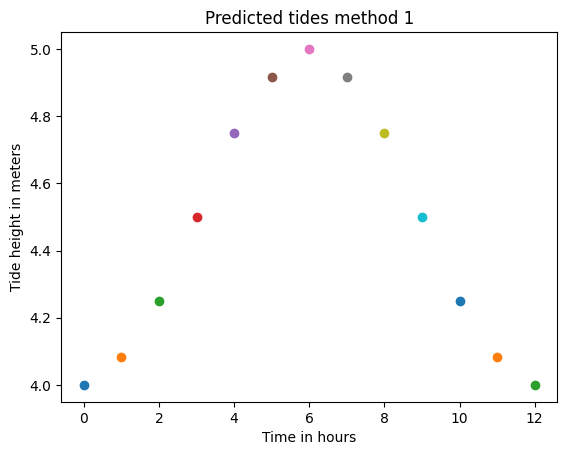

In [2]:
def tide_prediction_12(low_tide, high_tide):
    tidal_range = high_tide - low_tide
    twelfths = [1/12, 2/12, 3/12, 3/12, 2/12, 1/12]

    print("Hour\tTide Height")
    for hour in range(0, 13):
        if hour <= 6:
            tide_height = low_tide + (tidal_range * sum(twelfths[:hour]))
            plt.scatter(hour, tide_height)
        else:
            tide_height = high_tide - (tidal_range * sum(twelfths[:hour-6]))
            plt.scatter(hour, tide_height)


        print(f"{hour}\t{tide_height:.2f}")

high_tide = float(input('enter high tide: '))
low_tide = float(input('enter low tide: '))
tide_prediction_12(low_tide, high_tide)

plt.xlabel('Time in hours')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides method 1')

## Méthode 2
Cette méthode utilise les [Constituants harmoniques](https://tidesandcurrents.noaa.gov/about_harmonic_constituents.html)<br>
Cette méthode est plus complexe et précise. mais les paramètres modifiables n'étaient pas ceux que nous recherchions. nous décidons donc de ne pas utiliser cette méthode également

Text(0.5, 1.0, 'Predicted tides method 2')

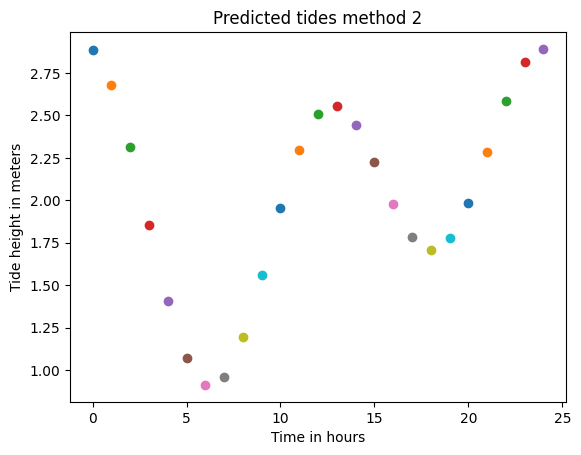

In [3]:

#les données ont été tirées de https://tidesandcurrents.noaa.gov/stations.html?type=Harmonic+Constituents
# (amplitude, speed, phase)
M2 = (0.542, 28.9841042, 271.4)
S2 = (0.225, 30.0000000, 260.4)
K1 = (0.337, 15.0410686, 88.0)
O1 = (0.214, 13.9430356, 81.0)

def tide_level(t, constituents, inital_tide):
    tide = inital_tide
    for amplitude, speed, phase in constituents:
        hours = (t - datetime.datetime(2000, 1, 1)).total_seconds() / 3600
        angle = (speed * hours + phase) % 360
        radians = math.radians(angle)
        tide += amplitude * math.sin(radians)
    return tide


constituents = [M2, S2, K1, O1]
now = datetime.datetime.now()
for i in range(25):
    t = now + datetime.timedelta(hours=i)
    level = tide_level(t, constituents, 2)
    #print(f"{t}: Tide level = {level:.2f} meters")
    plt.scatter(i, level)

plt.xlabel('Time in hours')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides method 2')


## Méthode 3
 
C'est notre méthode. (nous nous sommes inspirés des deux méthodes précédentes.)<br> 
#### explication :
- On calcule d'abord la [force génératrice](https://oceanservice.noaa.gov/education/tutorial_tides/tides02_cause.html) de la marée, 
- Puis on calcule l'angle correspondant au temps donné en heures, pour cela on suppose qu'une journée complète équivaut à 2π radians.
- Après on multiplie la somme des forces gravitationnelles du Soleil et de la Lune par la valeur absolue du sinus de l'angle temporel.
- Ce résultat est ensuite multiplié par la plage de marée donnée et divisé par un scalaire constant pour mettre le résultat à l'échelle de manière appropriée. 
- Enfin, le niveau de marée initial est ajouté pour obtenir le niveau de marée prévu.
<br/><br/>


Cette méthode est assez simplifiée et différente des processus physiques réels qui régissent les marées. <br>
Le calcul suppose que :
- la rotation et la révolution de la Terre autour du Soleil sont circulaires et coplanaires
- l'orbite de la Lune autour de la Terre est circulaire et coplanaire.
- Il ne considère que les effets de la lune et du soleil sur les marées et écarte tous les autres facteurs

Text(0.5, 1.0, 'Predicted tides method 3')

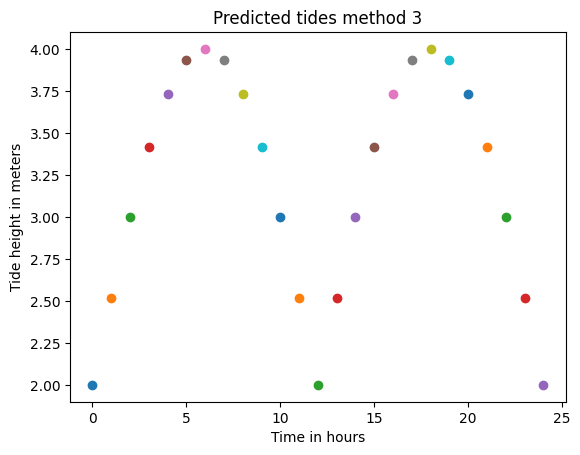

In [4]:
def tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, time, tidal_range, inital_tide):
    tide_force_sun = mass_sun/(distance_earth_sun**3)
    tide_force_moon = mass_moon/(distance_earth_moon**3)
    time_angle = (time / 24) * 2 * math.pi
    predectied_tide = (abs(math.sin(time_angle))*(tide_force_sun + tide_force_moon)* tidal_range/0.0018863228906849136)+inital_tide
    #print(f"The predicted tide height on {time} is {predectied_tide:.2f} meters.")
    return predectied_tide

mass_sun = 1.98892 * 10**30 # Mass of the Sun, Kg 
mass_moon =  7.34*10**22 # Mass of the Moon, Kg

distance_earth_moon = 384400000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149597870700  # Average distance between Earth and Sun, meters

for hour in range(25):
    plt.scatter(hour, tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, hour, 2, 2))

plt.xlabel('Time in hours')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides method 3')

Voici une prédiction de la site de [NOAA](https://en.wikipedia.org/wiki/National_Oceanic_and_Atmospheric_Administration). <br>

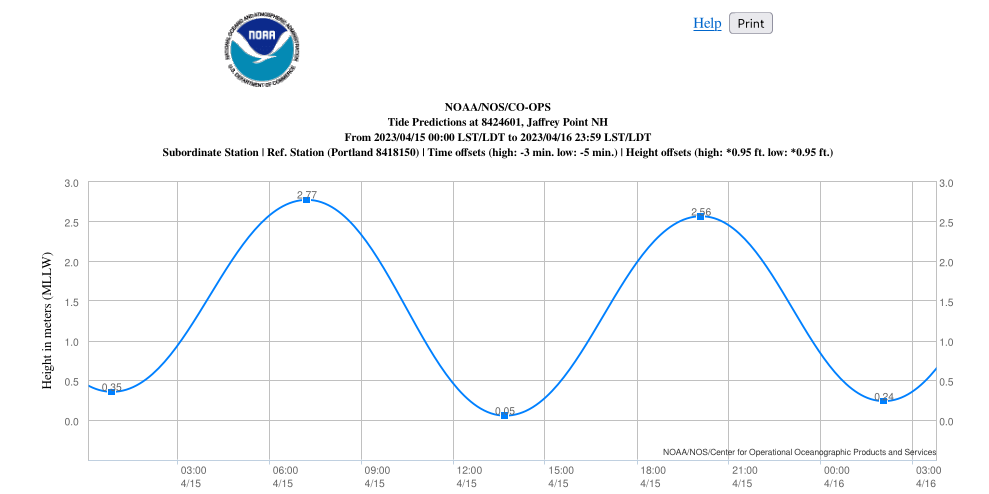

Nous pouvons voir que quelle que soit la méthode que nous utilisons, même les plus précises. Il y a toujours ce motif répétitif et même si les valeurs peuvent être un peu différentes, nous pensons que pour modéliser. Notre méthode est suffisant.

## Dans la partie suivante, nous exécutons des simulations sur la Terre
On prend les valeurs réelles de la masse et de la distance de la Lune et du Soleil, on calcule la hauteur de la marée à l'heure d'une marée haute 6, le marnage est égal à 1 mètre et la marée initiale est à 2 mètres

The predicted tide height on distance : 384400000 is 3.00 meters.
The predicted tide height on distance : 374400000 is 3.06 meters.
The predicted tide height on distance : 364400000 is 3.12 meters.
The predicted tide height on distance : 354400000 is 3.19 meters.
The predicted tide height on distance : 344400000 is 3.27 meters.
The predicted tide height on distance : 334400000 is 3.36 meters.
The predicted tide height on distance : 324400000 is 3.45 meters.
The predicted tide height on distance : 314400000 is 3.57 meters.
The predicted tide height on distance : 304400000 is 3.69 meters.
The predicted tide height on distance : 294400000 is 3.84 meters.
The predicted tide height on distance : 284400000 is 4.01 meters.
The predicted tide height on distance : 274400000 is 4.20 meters.
The predicted tide height on distance : 264400000 is 4.42 meters.
The predicted tide height on distance : 254400000 is 4.68 meters.
The predicted tide height on distance : 244400000 is 4.98 meters.


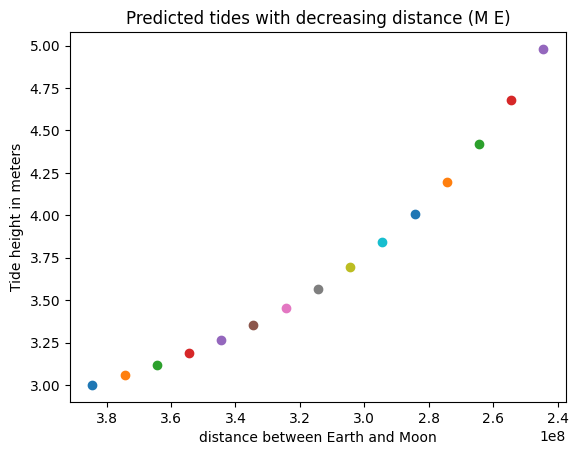

In [5]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, Kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Decrease the distance between the Moon and Earth by 1_000_000_0
for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(distance_earth_moon, predectied_tide)
    print(f"The predicted tide height on distance : {distance_earth_moon} is {predectied_tide:.2f} meters.")
    distance_earth_moon -= 1_000_000_0


plt.xlabel('Distance between Earth and Moon')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with decreasing distance (M E)')

plt.gca().invert_xaxis()

The predicted tide height on distance : 384400000 is 3.00 meters.
The predicted tide height on distance : 394400000 is 2.95 meters.
The predicted tide height on distance : 404400000 is 2.90 meters.
The predicted tide height on distance : 414400000 is 2.86 meters.
The predicted tide height on distance : 424400000 is 2.82 meters.
The predicted tide height on distance : 434400000 is 2.79 meters.
The predicted tide height on distance : 444400000 is 2.76 meters.
The predicted tide height on distance : 454400000 is 2.73 meters.
The predicted tide height on distance : 464400000 is 2.70 meters.
The predicted tide height on distance : 474400000 is 2.68 meters.
The predicted tide height on distance : 484400000 is 2.66 meters.
The predicted tide height on distance : 494400000 is 2.64 meters.
The predicted tide height on distance : 504400000 is 2.62 meters.
The predicted tide height on distance : 514400000 is 2.60 meters.
The predicted tide height on distance : 524400000 is 2.58 meters.


Text(0.5, 1.0, 'Predicted tides with increasing distance M E')

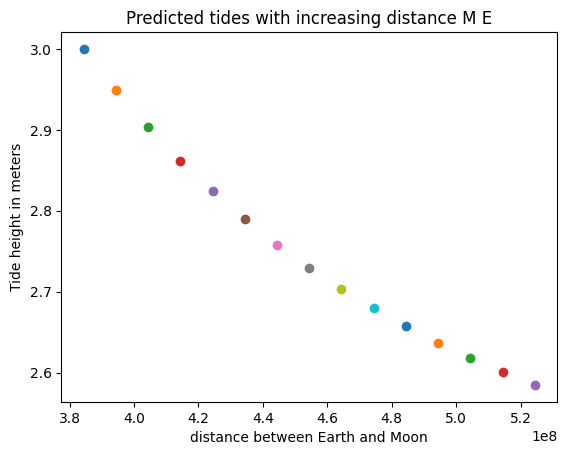

In [6]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, Kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Increase the distance between the Moon and Earth by 1_000_000_0

for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(distance_earth_moon, predectied_tide)
    print(f"The predicted tide height on distance : {distance_earth_moon} is {predectied_tide:.2f} meters.")

    distance_earth_moon += 1_000_000_0
    
plt.xlabel('Distance between Earth and Moon')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with increasing distance M E')

The predicted tide height on distance : 149597870700 is 3.00 meters.
The predicted tide height on distance : 148597870700 is 3.01 meters.
The predicted tide height on distance : 147597870700 is 3.01 meters.
The predicted tide height on distance : 146597870700 is 3.02 meters.
The predicted tide height on distance : 145597870700 is 3.03 meters.
The predicted tide height on distance : 144597870700 is 3.03 meters.
The predicted tide height on distance : 143597870700 is 3.04 meters.
The predicted tide height on distance : 142597870700 is 3.05 meters.
The predicted tide height on distance : 141597870700 is 3.06 meters.
The predicted tide height on distance : 140597870700 is 3.06 meters.
The predicted tide height on distance : 139597870700 is 3.07 meters.
The predicted tide height on distance : 138597870700 is 3.08 meters.
The predicted tide height on distance : 137597870700 is 3.09 meters.
The predicted tide height on distance : 136597870700 is 3.10 meters.
The predicted tide height on dista

Text(0.5, 1.0, 'Predicted tides with decreasing distance S E')

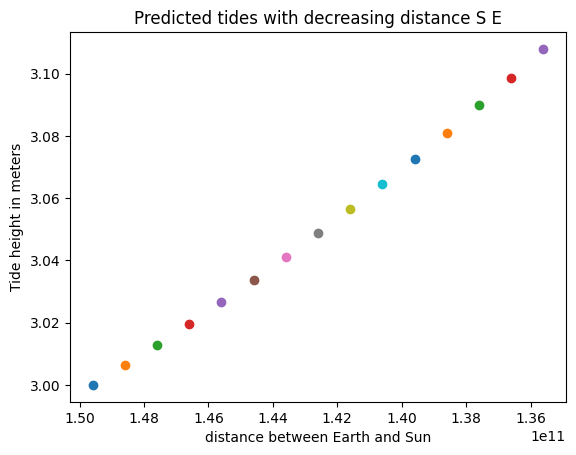

In [7]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun
mass_moon =  7.34*10**22 # Mass of the moon
 

# Decrease the distance between the Sun and Earth by 1_000_000_000


for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(distance_earth_sun, predectied_tide)
    print(f"The predicted tide height on distance : {distance_earth_sun} is {predectied_tide:.2f} meters.")
    distance_earth_sun -= 1_000_000_000

plt.gca().invert_xaxis()

plt.xlabel('Distance between Earth and Sun')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with decreasing distance S E')

The predicted tide height on distance : 149597870700 is 3.00 meters.
The predicted tide height on distance : 159597870700 is 2.94 meters.
The predicted tide height on distance : 169597870700 is 2.90 meters.
The predicted tide height on distance : 179597870700 is 2.87 meters.
The predicted tide height on distance : 189597870700 is 2.84 meters.
The predicted tide height on distance : 199597870700 is 2.82 meters.
The predicted tide height on distance : 209597870700 is 2.80 meters.
The predicted tide height on distance : 219597870700 is 2.78 meters.
The predicted tide height on distance : 229597870700 is 2.77 meters.
The predicted tide height on distance : 239597870700 is 2.76 meters.
The predicted tide height on distance : 249597870700 is 2.75 meters.
The predicted tide height on distance : 259597870700 is 2.75 meters.
The predicted tide height on distance : 269597870700 is 2.74 meters.
The predicted tide height on distance : 279597870700 is 2.73 meters.
The predicted tide height on dista

Text(0.5, 1.0, 'Predicted tides with increasing distance S E')

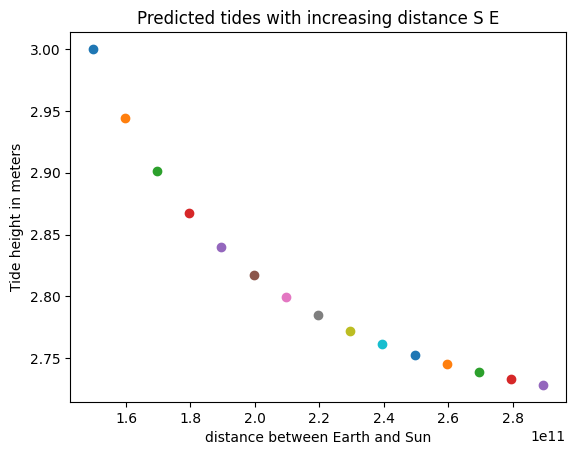

In [8]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, Kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Increase the distance between the Sun and Earth by 1_000_000_000_0

for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(distance_earth_sun, predectied_tide)
    print(f"The predicted tide height on distance : {distance_earth_sun} is {predectied_tide:.2f} meters.")

    distance_earth_sun += 1_000_000_000_0
    
plt.xlabel('Distance between Earth and Sun')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with increasing distance S E')

The predicted tide height on mass : 7.34e+22 is 3.00 meters.
The predicted tide height on mass : 7.2400000000000004e+22 is 2.99 meters.
The predicted tide height on mass : 7.140000000000001e+22 is 2.98 meters.
The predicted tide height on mass : 7.040000000000001e+22 is 2.97 meters.
The predicted tide height on mass : 6.940000000000001e+22 is 2.96 meters.
The predicted tide height on mass : 6.840000000000001e+22 is 2.95 meters.
The predicted tide height on mass : 6.7400000000000015e+22 is 2.94 meters.
The predicted tide height on mass : 6.640000000000002e+22 is 2.93 meters.
The predicted tide height on mass : 6.540000000000002e+22 is 2.93 meters.
The predicted tide height on mass : 6.440000000000002e+22 is 2.92 meters.
The predicted tide height on mass : 6.340000000000002e+22 is 2.91 meters.
The predicted tide height on mass : 6.2400000000000025e+22 is 2.90 meters.
The predicted tide height on mass : 6.140000000000003e+22 is 2.89 meters.
The predicted tide height on mass : 6.0400000000

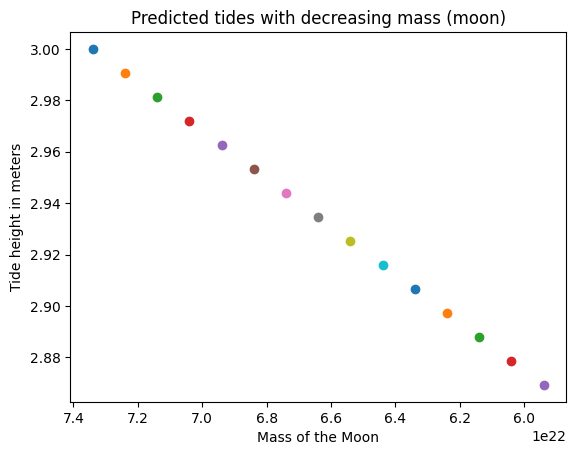

In [9]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Decrease the mass of the Moon by 1_000_000_000_000_000_000_000
for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(mass_moon, predectied_tide)
    print(f"The predicted tide height on mass : {mass_moon} is {predectied_tide:.2f} meters.")
    mass_moon -= 1_000_000_000_000_000_000_000


plt.xlabel('Mass of the Moon')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with decreasing mass (moon)')

plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Predicted tides with increasing mass (moon)')

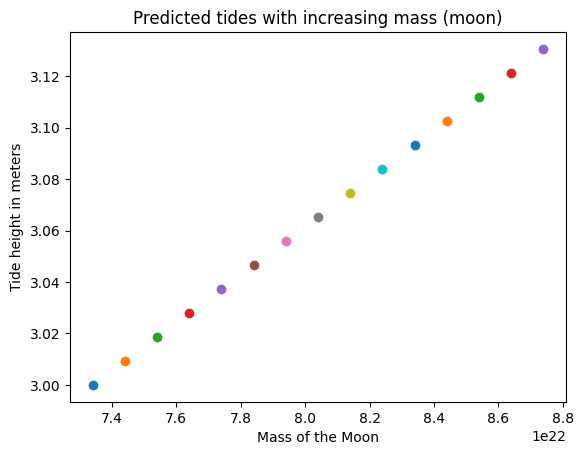

In [18]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Increase the mass of the Moon by 1_000_000_000_000_000_000_000
for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(mass_moon, predectied_tide)
    #print(f"The predicted tide height on mass : {mass_moon} is {predectied_tide:.2f} meters.")
    mass_moon += 1_000_000_000_000_000_000_000


plt.xlabel('Mass of the Moon')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with increasing mass (moon)')


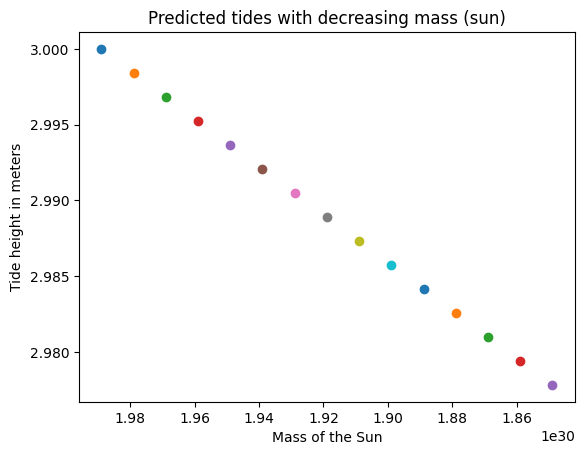

In [19]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Decrease the mass of the Sun by 1_000_000_000_000_000_000_000_000_000_0
for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(mass_sun, predectied_tide)
    #print(f"The predicted tide height on mass : {mass_sun} is {predectied_tide:.2f} meters.")
    mass_sun -= 1_000_000_000_000_000_000_000_000_000_0


plt.xlabel('Mass of the Sun')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with decreasing mass (sun)')
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Predicted tides with decreasing mass (sun)')

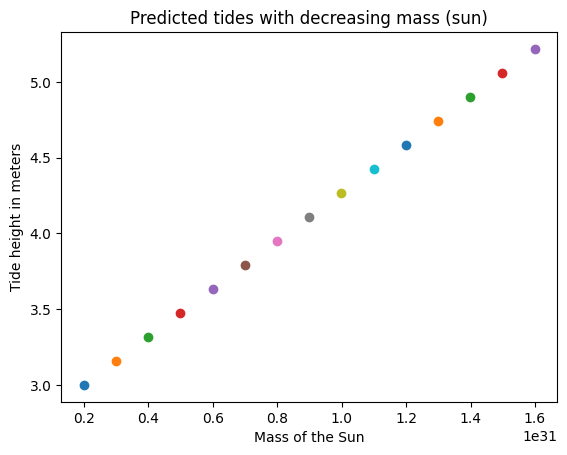

In [20]:
distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun, kg
mass_moon =  7.34*10**22 # Mass of the moon, Kg
 

# Decrease the mass of the Sun by 1_000_000_000_000_000_000_000_000_000_000
for i in range(15):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(mass_sun, predectied_tide)
    #print(f"The predicted tide height on mass : {mass_sun} is {predectied_tide:.2f} meters.")
    mass_sun += 1_000_000_000_000_000_000_000_000_000_000


plt.xlabel('Mass of the Sun')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with decreasing mass (sun)')

# Quelques remarques
- Nous pouvons voir que la distance a un effet beaucoup plus important sur les marées que la masse.
- Lorsque la distance diminue, la hauteur des marées augmente et inversement lorsque la distance augmente, la hauteur des marées diminue.
- Quand la masse augmente la hauteur des marées augmente aussi et quand elle diminue la hauteur des marées diminue.
- Nous pouvons également voir qu'à mesure que la distance augmente, il y a un point où la force gravitationnelle est si faible que son effet sur les marées est presque nul.

Text(0.5, 1.0, 'Predicted tides with increasing distance M E')

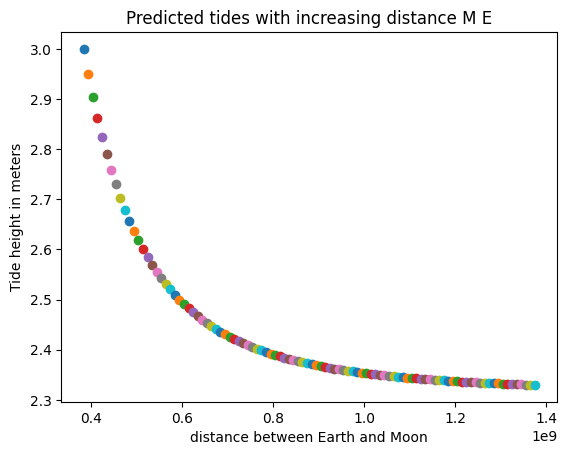

In [13]:
# Pour tester la dernière remarque

distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun
mass_moon =  7.34*10**22 # Mass of the moon
 

# Increase the distance between the Moon and Earth by 1_000_000_0

for i in range(100):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(distance_earth_moon, predectied_tide)
    #print(f"The predicted tide height on distance : {distance_earth_moon} is {predectied_tide:.2f} meters.")

    distance_earth_moon += 1_000_000_0
    
plt.xlabel('distance between Earth and Moon')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with increasing distance M E')

Text(0.5, 1.0, 'Predicted tides with increasing distance S E')

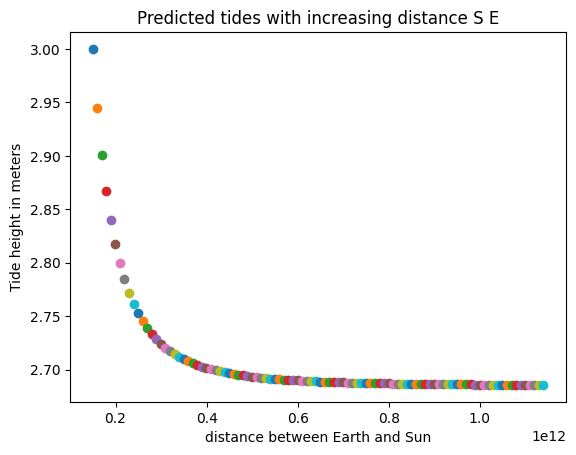

In [14]:
# Pour tester la dernière remarque


distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun
mass_moon =  7.34*10**22 # Mass of the moon
 

# Increase the distance between the Sun and Earth by 1_000_000_000_0

for i in range(100):
    predectied_tide = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, 6, 1, 2)
    plt.scatter(distance_earth_sun, predectied_tide)
    #print(f"The predicted tide height on distance : {distance_earth_sun} is {predectied_tide:.2f} meters.")

    distance_earth_sun += 1_000_000_000_0
    
plt.xlabel('distance between Earth and Sun')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with increasing distance S E')

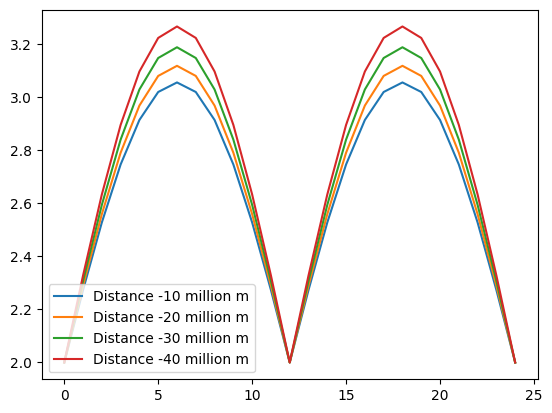

In [15]:
# Pour tester si le choix de de l'heure ne changera rien (spoiler ça ne change rien)

distance_earth_moon = 384_400_000 # Average distance between Earth and Moon, meters
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters

mass_sun = 1.98892 * 10**30 # Mass of the sun
mass_moon =  7.34*10**22 # Mass of the moon


for i in range(4):
    tide_heights = []
    distance_earth_moon -= 1_000_000_0

    for j in range(25):
        tide_height = tide_prediction_simple(mass_sun, mass_moon, distance_earth_moon, distance_earth_sun, j, 1, 2)
        tide_heights.append(tide_height)
    
    plt.plot(range(25), tide_heights, label=f"Distance -{10*(i+1)} million m")

plt.legend()
plt.show()

# Remarque
Les paramètres (time, tidal_range, inital_tide) ne changeront que les valeurs mais le principe restera le même.

# Modifications
Supposons que nous voulons tester une autre planète qui a plusieurs lunes / soleils / étoiles. On pourrait facilement modifier cette fonction pour lui passer des dictionnaires en argument par exemple :

Text(0.5, 1.0, 'Predicted tides method 3')

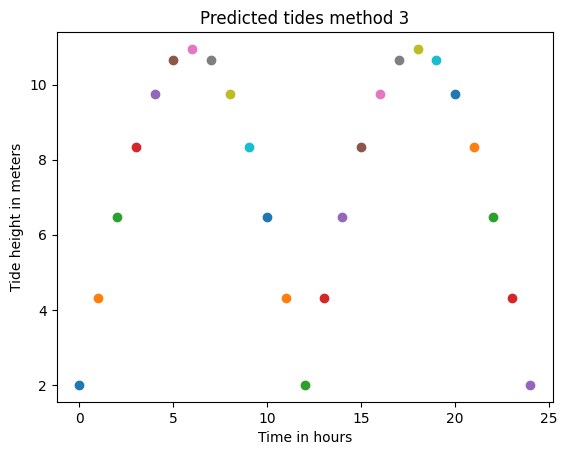

In [16]:
def tide_prediction_simple_mod(mass_sun, moons, distance_earth_sun, time, tidal_range, inital_tide):
    tide_force_sun = mass_sun/(distance_earth_sun**3)
    tide_force_moons = 0
    for mass_moon, distance_earth_moon in moons.items():
        tide_force_moon = mass_moon/(distance_earth_moon**3)
        tide_force_moons += tide_force_moon
    time_angle = (time / 24) * 2 * math.pi
    predicted_tide = (abs(math.sin(time_angle))*(tide_force_sun + tide_force_moons) * tidal_range/0.0018863228906849136) + inital_tide
    #print(f"The predicted tide height on {time} is {predicted_tide:.2f} meters.")
    return predicted_tide


mass_sun = 1.98892 * 10**30 # Mass of the Sun, Kg 
distance_earth_sun = 149597870700  # Average distance between Earth and Sun, meters

moons = {7.34*10**22: 384.4e6, 8.9319e22: 238.855e6}

for hour in range(25):
    plt.scatter(hour, tide_prediction_simple_mod(mass_sun, moons, distance_earth_sun, hour, 2, 2))

plt.xlabel('Time in hours')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides method 3')

**Comme nous pouvons le voir ici, nous avons mis deux lunes et maintenant nous pourrions exécuter les simulations que nous faisions auparavant par exemple:**

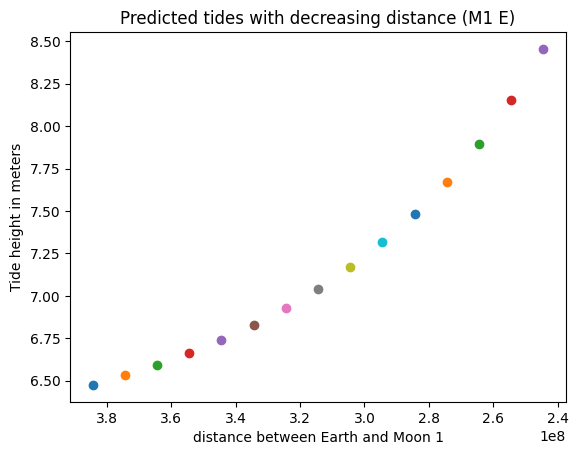

In [17]:
distance_earth_sun = 149_597_870_700 # Average distance between Earth and Sun, meters
mass_sun = 1.98892 * 10**30 # Mass of the sun
 
moons = {7.34*10**22: 384.4e6, 8.9319e22: 238.855e6}


# Decrease the distance between the Moon and Earth by 1_000_000_0
for i in range(15):
    predectied_tide = tide_prediction_simple_mod(mass_sun, moons, distance_earth_sun, 6, 1, 2)
    plt.scatter(moons[7.34*10**22], predectied_tide)
    moons[7.34*10**22] -= 1_000_000_0



plt.xlabel('distance between Earth and Moon 1')
plt.ylabel('Tide height in meters')
plt.title('Predicted tides with decreasing distance (M1 E)')


plt.gca().invert_xaxis()

# conclusion

Enfin, nous pouvons voir qu'avec une méthode simple, nous pourrions obtenir une estimation approximative des marées, ce qui pourrait ensuite nous aider de plusieurs manières :
- Nous aide à comprendre le système terrestre.
- Nous donne un aperçu de l'habitabilité d'une planète (climat, potentiel en eau liquide, activité géologique, etc.)
- Les marées peuvent également être une source potentielle d'énergie renouvelable